**Rainfall Estimation**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


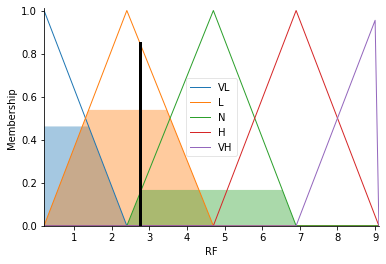

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

TP = ctrl.Antecedent(np.arange(20.4, 41.3, 0.1), 'TP')
WS = ctrl.Antecedent(np.arange(0.7, 3.15, 0.05), 'WS')

# Creating output signal
RF = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'RF')

# Creating membership function

TP['VL'] = fuzz.trimf(TP.universe, [20.4, 20.4, 25.6])
TP['L']  = fuzz.trimf(TP.universe, [20.4, 25.6, 30.8])
TP['N']  = fuzz.trimf(TP.universe, [25.6, 30.8, 36.0])
TP['H']  = fuzz.trimf(TP.universe, [30.8, 36.0, 41.2])
TP['VH'] = fuzz.trimf(TP.universe, [36.0, 41.2, 41.2])

WS['VL'] = fuzz.trimf(WS.universe, [0.7, 0.7, 1.3])
WS['L']  = fuzz.trimf(WS.universe, [0.7, 1.3, 1.9])
WS['N']  = fuzz.trimf(WS.universe, [1.3, 1.9, 2.5])
WS['H']  = fuzz.trimf(WS.universe, [1.9, 2.5, 3.1])
WS['VH'] = fuzz.trimf(WS.universe, [2.5, 3.1, 3.1])

RF['VL'] = fuzz.trimf(RF.universe, [0.2, 0.2, 2.4])
RF['L']  = fuzz.trimf(RF.universe, [0.2, 2.4, 4.7])
RF['N']  = fuzz.trimf(RF.universe, [2.4, 4.7, 6.9])
RF['H']  = fuzz.trimf(RF.universe, [4.7, 6.9, 9.1])
RF['VH'] = fuzz.trimf(RF.universe, [6.9, 9.1, 9.1])

# Rule creation

r1 = ctrl.Rule((TP['VL'] & WS['VL'])|
               (TP['L']  & WS['VL'])|
               (TP['VL'] & WS['L']) |
               (TP['VL'] & WS['N']) |
               (TP['N']  & WS['VL']), RF['VL'])

r2 = ctrl.Rule((TP['L'] & WS['L'])|
               (TP['N'] & WS['L'])|
               (TP['L'] & WS['N'])|
               (TP['H'] & WS['VL'])|
               (TP['VL'] & WS['H']), RF['L'])

r3 = ctrl.Rule((TP['VH'] & WS['VL'])|
               (TP['VL'] & WS['VH'])|
               (TP['L']  & WS['H']) |
               (TP['H']  & WS['L']) |
               (TP['N']  & WS['N']), RF['N'])

r4 = ctrl.Rule((TP['H']  & WS['H']) |
               (TP['VH'] & WS['L']) |
               (TP['L']  & WS['VH'])|
               (TP['H']  & WS['N']) |
               (TP['N']  & WS['H']), RF['H'])

r5 = ctrl.Rule((TP['N']  & WS['VH'])|
               (TP['H']  & WS['VH'])|
               (TP['VH'] & WS['VH'])|
               (TP['VH'] & WS['N'] )|
               (TP['VH'] & WS['N']), RF['VH'])

rainfall_ctrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
rainfall      = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfall.input['TP'] = 23.2
rainfall.input['WS'] = 2.0
rainfall.compute()
RF.view(sim=rainfall)

**Medical Diagnosis**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


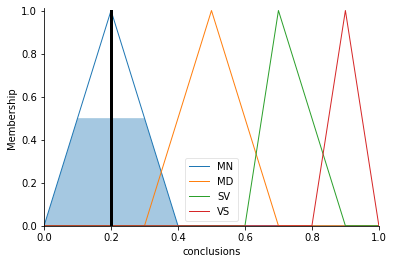

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

point = np.arange(0, 1.1, 0.1)

symptoms_list = ['fever', 'head', 'nausea', 'vomit', 'jaundice', 'EL', 'JP', 'BW', 'dizzy', 'LA', 'MP']

for i in symptoms_list:
  exec("%s = ctrl.Antecedent(point, '%s')" % (i, i))

# Creating output signal
conclusions  = ctrl.Consequent(point, 'conclusions')

# Create membership function

l = symptoms_list
l.append('conclusions')

for i in l:
  exec("%s['MN'] = fuzz.trimf(%s.universe, [0.0, 0.2, 0.4])" % (i, i))
  exec("%s['MD'] = fuzz.trimf(%s.universe, [0.3, 0.5, 0.7])" % (i, i))
  exec("%s['SV'] = fuzz.trimf(%s.universe, [0.6, 0.7, 0.9])" % (i, i))
  exec("%s['VS'] = fuzz.trimf(%s.universe, [0.8, 0.9, 1.0])" % (i, i))

# Rule creation

r1 = ctrl.Rule((fever['MN'] & head['MN'] & nausea['MN'] & vomit['MN'] & jaundice['MN']
              & EL['MN'] & JP['MN'] & BW['MN'] & dizzy['SV'] & LA['MN'] & MP['MN'])|
                (fever['MN'] & head['MD'] & nausea['MD'] & vomit['MN'] & jaundice['MN']
              & EL['MN'] & JP['MN'] & BW['MN'] & dizzy['MD'] & LA['MN'] & MP['MN'])|
               (fever['MN'] & head['MN'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['MD'] & JP['MN'] & BW['MN'] & dizzy['SV'] & LA['MN'] & MP['MN']), conclusions['MN'])

r2 = ctrl.Rule((fever['MD'] & head['MN'] & nausea['MN'] & vomit['MN'] & jaundice['MN']
              & EL['MN'] & JP['MD'] & BW['MD'] & dizzy['SV'] & LA['SV'] & MP['MD'])|
               (fever['MD'] & head['MN'] & nausea['MN'] & vomit['MD'] & jaundice['MN']
              & EL['MN'] & JP['MD'] & BW['MD'] & dizzy['MD'] & LA['SV'] & MP['MD'])|
               (fever['MD'] & head['MD'] & nausea['MD'] & vomit['MD'] & jaundice['MD']
              & EL['MD'] & JP['MD'] & BW['MD'] & dizzy['MD'] & LA['MD'] & MP['MD'])|
               (fever['MD'] & head['MN'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['SV'] & JP['MD'] & BW['MD'] & dizzy['SV'] & LA['MD'] & MP['MD'])|
               (fever['MN'] & head['MD'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['MN'] & JP['MN'] & BW['MD'] & dizzy['MN'] & LA['MD'] & MP['MD'])|
               (fever['MD'] & head['MD'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['MN'] & JP['MD'] & BW['MD'] & dizzy['MD'] & LA['MD'] & MP['MD']), conclusions['MD'])

r3 = ctrl.Rule((fever['SV'] & head['MD'] & nausea['MN'] & vomit['MN'] & jaundice['MN']
              & EL['MN'] & JP['MN'] & BW['SV'] & dizzy['SV'] & LA['SV'] & MP['MD'])|
               (fever['MN'] & head['MN'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['MN'] & JP['SV'] & BW['SV'] & dizzy['MD'] & LA['MD'] & MP['MD'])|
               (fever['MD'] & head['SV'] & nausea['MD'] & vomit['SV'] & jaundice['MD']
              & EL['SV'] & JP['MD'] & BW['SV'] & dizzy['MD'] & LA['MN'] & MP['MD'])|
               (fever['SV'] & head['SV'] & nausea['MD'] & vomit['SV'] & jaundice['SV']
              & EL['SV'] & JP['SV'] & BW['SV'] & dizzy['MD'] & LA['MD'] & MP['SV'])|
               (fever['MN'] & head['MN'] & nausea['MN'] & vomit['MD'] & jaundice['MN']
              & EL['MN'] & JP['MN'] & BW['SV'] & dizzy['MN'] & LA['SV'] & MP['MD']), conclusions['SV'])

r4 = ctrl.Rule((fever['VS'] & head['MN'] & nausea['MN'] & vomit['MN'] & jaundice['MN']
              & EL['MN'] & JP['SV'] & BW['SV'] & dizzy['MN'] & LA['MN'] & MP['SV'])|
               (fever['VS'] & head['MD'] & nausea['MN'] & vomit['MD'] & jaundice['SV']
              & EL['MD'] & JP['MN'] & BW['VS'] & dizzy['SV'] & LA['MN'] & MP['MD'])|
               (fever['SV'] & head['SV'] & nausea['SV'] & vomit['SV'] & jaundice['SV']
              & EL['SV'] & JP['SV'] & BW['VS'] & dizzy['SV'] & LA['SV'] & MP['SV'])|
               (fever['MN'] & head['VS'] & nausea['MD'] & vomit['MD'] & jaundice['MN']
              & EL['MD'] & JP['MN'] & BW['MD'] & dizzy['VS'] & LA['MN'] & MP['MD'])|
               (fever['MD'] & head['VS'] & nausea['VS'] & vomit['MN'] & jaundice['SV']
              & EL['SV'] & JP['MD'] & BW['SV'] & dizzy['VS'] & LA['VS'] & MP['SV'])|
               (fever['VS'] & head['SV'] & nausea['SV'] & vomit['SV'] & jaundice['SV']
              & EL['SV'] & JP['SV'] & BW['SV'] & dizzy['SV'] & LA['SV'] & MP['MD']), conclusions['VS'])

conclusions_ctrl = ctrl.ControlSystem([r1, r2, r3, r4])
conclusions_sim  = ctrl.ControlSystemSimulation(conclusions_ctrl)

conclusions_sim.input['fever'] = 0.1
conclusions_sim.input['head'] = 0.1
conclusions_sim.input['nausea'] = 0.1
conclusions_sim.input['vomit'] = 0.1
conclusions_sim.input['jaundice'] = 0.2
conclusions_sim.input['EL'] = 0.3
conclusions_sim.input['JP'] = 0.2
conclusions_sim.input['BW'] = 0.2
conclusions_sim.input['dizzy'] = 0.7
conclusions_sim.input['LA'] = 0.2
conclusions_sim.input['MP'] = 0.2

conclusions_sim.compute()
conclusions.view(sim=conclusions_sim)

**Stock Market**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


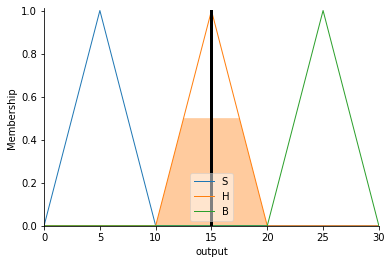

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

range = np.arange(0, 101, 1)

RSI  = ctrl.Antecedent(range, 'RSI')
SO   = ctrl.Antecedent(range, 'SO')
MACD = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'MACD')
OBV = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'OBV')

# Creating output signal
output = ctrl.Consequent(np.arange(0,30.1, 0.1), 'output')

# Create membership function

MACD['L'] = fuzz.sigmf(MACD.universe, 0.0, -1000)
MACD['H'] = fuzz.sigmf(MACD.universe, 0.0, 1000)

OBV['L'] = fuzz.sigmf(MACD.universe, 0.0, -1000)
OBV['H'] = fuzz.sigmf(MACD.universe, 0.0, 1000)

RSI['L'] = fuzz.trimf(RSI.universe, [0, 15, 30])
RSI['M'] = fuzz.trimf(RSI.universe, [30, 50, 70])
RSI['H'] = fuzz.trimf(RSI.universe, [70, 85, 100])

SO['L'] = fuzz.trimf(SO.universe, [0, 10, 20])
SO['M'] = fuzz.trimf(SO.universe, [20, 50, 80])
SO['H'] = fuzz.trimf(SO.universe, [80, 90, 100])

output['S'] = fuzz.trimf(output.universe, [0, 5, 10])
output['H'] = fuzz.trimf(output.universe, [10, 15, 20])
output['B'] = fuzz.trimf(output.universe, [20, 25, 30])

# Rule creation

r1 = ctrl.Rule((MACD['H'] & RSI['L'] & SO['L'] & OBV['H'])|
               (MACD['L'] & RSI['H'] & SO['H'] & OBV['L'])|
               (MACD['H'] & RSI['M'] & SO['M'] & OBV['H'])|
               (RSI['L'] & SO['L'] & OBV['H']), output['B'])

r2 = ctrl.Rule((MACD['L'] & RSI['M'] & SO['H'] & OBV['L'])|
               (MACD['L'] & RSI['H'] & OBV['H'])|
               (RSI['H'] & SO['H'] & OBV['L']), output['S'])

r3 = ctrl.Rule((MACD['L'] & RSI['M'] & SO['M'])|
               (MACD['H'] & RSI['M'] & SO['M'] & OBV['L']), output['H'])

decision_ctrl = ctrl.ControlSystem([r1, r2, r3])
decision = ctrl.ControlSystemSimulation(decision_ctrl)

decision.input['MACD'] = -0.3
decision.input['OBV']  = 0.2
decision.input['RSI']  = 40
decision.input['SO']   = 40

decision.compute()
output.view(sim=decision)

**Children Clothing Size Recommendation - Brand A**

In [34]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

Height = ctrl.Antecedent(np.arange(98.6, 155.01, 0.1), 'Height')
Weight = ctrl.Antecedent(np.arange(17.0, 45.01, 0.1), "Weight")
Waist  = ctrl.Antecedent(np.arange(45.05, 66.01, 0.1), 'Waist')

# Creating output signal
Size_A = ctrl.Consequent(np.arange(5, 14.5, 0.05), 'Size_A')

# Create membership function

size_array = [5.0, 6.0, 6.5, 7.0, 8.0, 10.0, 12.0, 14.0]

h_b = np.array([111.94, 118.70, 123.52, 129.31, 133.17, 137.03, 143.79, 149.58])
h_c = np.array([116.00, 123.00, 128.00, 134.00, 138.00, 142.00, 149.00, 155.00])

we_b = np.array([19.30, 21.23, 22.20, 24.13, 27.02, 31.85, 37.64, 43.43])
we_c = np.array([20.00, 22.00, 23.00, 25.00, 28.00, 33.00, 39.00, 45.00])

wa_b = np.array([51.15, 53.08, 54.04, 55.01, 55.97, 58.87, 61.76, 63.69])
wa_c = np.array([53.00, 55.00, 56.00, 57.00, 58.00, 61.00, 64.00, 66.00])

num = [0,1,2,3,4,5,6,7]

for i in num:
    Height[size_array[i]] = fuzz.trimf(Height.universe, [98.6, h_b[i], h_c[i]])
    Weight[size_array[i]] = fuzz.trimf(Weight.universe, [17.0, we_b[i], we_c[i]])
    Waist[size_array[i]]  = fuzz.trimf(Waist.universe, [45.05, wa_b[i], wa_c[i]])

Size_A['5']  = fuzz.trimf(Size_A.universe,[5   , 5  , 5.5])
Size_A['6']  = fuzz.trimf(Size_A.universe,[5.5 , 6  , 6.5])
Size_A['6X'] = fuzz.trimf(Size_A.universe,[6   , 6.5, 7])
Size_A['7']  = fuzz.trimf(Size_A.universe,[6.5 , 7  , 7.5])
Size_A['8']  = fuzz.trimf(Size_A.universe,[7.5 , 8  , 8.5])
Size_A['10'] = fuzz.trimf(Size_A.universe,[8.5 , 10 , 11.5])
Size_A['12'] = fuzz.trimf(Size_A.universe,[11.5, 12 , 12.5])
Size_A['14'] = fuzz.trimf(Size_A.universe,[12.5, 14 , 14])

rule_list = []
SizeA_dict ={5: '5', 6: '6', 7: '7', 8: '8', 10: '10', 12: '12', 14: '14', 6.5: '6X' }

for height in size_array:
    for weight in size_array:
        for waist in size_array:
            size_max = np.max([height, weight, waist])
            rule_list.append(ctrl.Rule(Height[height] & Weight[weight] & Waist[waist], Size_A[SizeA_dict[size_max]]))

SizeA_ctrl = ctrl.ControlSystem(rule_list)
Recommendation = ctrl.ControlSystemSimulation(SizeA_ctrl)

Recommendation.input['Height'] = 130.0
Recommendation.input['Weight'] = 32.0
Recommendation.input['Waist'] = 52.0

Recommendation.compute()
Size_A.view(sim=Recommendation)

KeyboardInterrupt: 

**Adaptive Food Suggestion**

In [35]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

taste       = ctrl.Antecedent(np.linspace(0, 10, 100), 'Taste')
environment = ctrl.Antecedent(np.linspace(0, 10, 100), 'Environment')
budget      = ctrl.Antecedent(np.linspace(0, 9 , 100), 'Budget')
userReview  = ctrl.Antecedent(np.linspace(0, 5 , 100), 'User Review')
location    = ctrl.Antecedent(np.linspace(0, 3 , 100), 'Location')

# Creating output signal
preference = ctrl.Consequent(np.linspace(0, 15, 100), 'Preference')

# Create membership function
taste[1] = fuzz.gaussmf(taste.universe, 0, 2)
taste[2] = fuzz.gaussmf(taste.universe, 5, 2)
taste[3] = fuzz.gaussmf(taste.universe, 10, 2)

environment[1] = fuzz.gaussmf(environment.universe, 0, 2)
environment[2] = fuzz.gaussmf(environment.universe, 5, 2)
environment[3] = fuzz.gaussmf(environment.universe, 10, 2)

budget[3] = fuzz.gaussmf(budget.universe, 0, 1)
budget[2] = fuzz.gaussmf(budget.universe, 4.5, 1)
budget[1] = fuzz.gaussmf(budget.universe, 9, 1)

userReview[1] = fuzz.gaussmf(userReview.universe, 0, 0.5)
userReview[2] = fuzz.gaussmf(userReview.universe, 2.5, 0.5)
userReview[3] = fuzz.gaussmf(userReview.universe, 5, 0.5)

location[3] = fuzz.gaussmf(location.universe, 0, 0.5)
location[2] = fuzz.gaussmf(location.universe, 1.5, 0.5)
location[1] = fuzz.gaussmf(location.universe, 3, 0.5)

preference[1] = fuzz.gaussmf(preference.universe, 1.5, 1)
preference[2] = fuzz.gaussmf(preference.universe, 4.5, 1)
preference[3] = fuzz.gaussmf(preference.universe, 7.5, 1)
preference[4] = fuzz.gaussmf(preference.universe, 10.5, 1)
preference[5] = fuzz.gaussmf(preference.universe, 13.5, 1)

# Rule creation
rule = []
value = [1, 2, 3]

for i1 in value:
    for i2 in value:
        for i3 in value:
            for i4 in value:
                for i5 in value:
                    lvl = (i1 + i2 + i3 + i4 + i5) // 3
                    rule.append(ctrl.Rule(taste[i1] & environment[i2] & budget[i3] & userReview[i4] & location[i5], preference[lvl]))

preferrence_control = ctrl.ControlSystem(rule)
preference_simulation = ctrl.ControlSystemSimulation(preferrence_control)

preference_simulation.input['Taste'] = 5
preference_simulation.input['Environment'] = 8
preference_simulation.input['Budget'] = 3
preference_simulation.input['User Review'] = 6
preference_simulation.input['Location'] = 2

preference_simulation.compute()
print(preference_simulation.output['Preference'])

# Rainfall
preference.view(sim = preference_simulation)

KeyboardInterrupt: 

**Transplant Patients**

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

Glycaemia    = ctrl.Antecedent(np.arange(50, 151, 1), 'GLY')
Sirolimus    = ctrl.Antecedent(np.arange(0,  20.05, 0.05), 'SIR')
Cyclosporine = ctrl.Antecedent(np.arange(0,  20.05, 0.05), 'CYC')
DiffACE      = ctrl.Antecedent(np.arange(0,  20.05, 0.05), 'DIF')

# Creating output signal

Proteinuria = ctrl.Consequent(np.linspace(0, 4000, 1000), 'PRO')
GFR         = ctrl.Consequent(np.linspace(0,  100, 1000), 'GFR')

# Create membership functions
Glycaemia['good']   = fuzz.trimf(Glycaemia.universe,[ 70,  85,  99])
Glycaemia['alarm']  = fuzz.trimf(Glycaemia.universe,[100, 113, 125])
Glycaemia['danger'] = fuzz.trimf(Glycaemia.universe,[125, 150, 150])

Sirolimus['alarm down'] = fuzz.trimf(Sirolimus.universe,[  0,   2.5,  5])
Sirolimus['sufficient'] = fuzz.trimf(Sirolimus.universe,[  4,   5.5,  7])
Sirolimus['good']       = fuzz.trimf(Sirolimus.universe,[  6,     9, 12])
Sirolimus['alarm up']   = fuzz.trimf(Sirolimus.universe,[ 11,  12.5, 14])
Sirolimus['danger']     = fuzz.trimf(Sirolimus.universe,[ 13,  16.5, 20])

Cyclosporine['alarm down']  = fuzz.trimf(Cyclosporine.universe,[  0,    1, 2 ])
Cyclosporine['good']        = fuzz.trimf(Cyclosporine.universe,[1.5,  3.2, 5 ])
Cyclosporine['sufficient']  = fuzz.trimf(Cyclosporine.universe,[  4,  7.5, 11])
Cyclosporine['alarm up']    = fuzz.trimf(Cyclosporine.universe,[  8, 11.5, 15])
Cyclosporine['danger']      = fuzz.trimf(Cyclosporine.universe,[ 12,   16, 20])

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[   0,    0, 1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[   0, 1.25,  2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[1.25,  2.5,    5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[ 2.5,    5,   10])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[   5,   10,   10])

Proteinuria['good']       = fuzz.trimf(Proteinuria.universe,[   0,    0, 150 ])
Proteinuria['sufficient'] = fuzz.trimf(Proteinuria.universe,[ 150,  325, 500 ])
Proteinuria['alterate']   = fuzz.trimf(Proteinuria.universe,[ 500,  750, 1000])
Proteinuria['alarm']      = fuzz.trimf(Proteinuria.universe,[1000, 2000, 3000])
Proteinuria['danger']      = fuzz.trimf(Proteinuria.universe,[3000, 4000, 4000])

GFR['good']  = fuzz.trimf(GFR.universe,[90,   90, 100])
GFR['alarm 2'] = fuzz.trimf(GFR.universe,[50,   75,  90])
GFR['alarm 3'] = fuzz.trimf(GFR.universe,[30,   45,  60])
GFR['alarm 4'] = fuzz.trimf(GFR.universe,[15, 22.5,  30])
GFR['danger']    = fuzz.trimf(GFR.universe,[ 0,    0,  15])

55.33092323050352


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


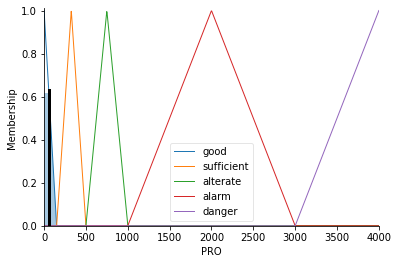

In [26]:
# ProtFIS

ProtRule = []

ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['good'], Proteinuria['good']))
ProtRule.append(ctrl.Rule(Glycaemia['danger'] & Sirolimus['danger'], Proteinuria['danger']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['sufficient'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['alarm up'], Proteinuria['alarm']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['sufficient'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm up'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['good'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm down'], Proteinuria['sufficient']))

ProtFIS_control = ctrl.ControlSystem(ProtRule)
ProtFIS_simulation = ctrl.ControlSystemSimulation(ProtFIS_control)

ProtFIS_simulation.input['GLY'] = 90
ProtFIS_simulation.input['SIR'] = 7.85

ProtFIS_simulation.compute()
print(ProtFIS_simulation.output['PRO'])
Proteinuria.view(sim = ProtFIS_simulation)

45.00001385146008


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


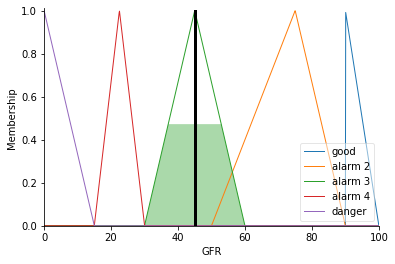

In [25]:
GFRRule = []

GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['danger'], GFR['danger']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['danger'], GFR['alarm 3']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['alarm up'], GFR['alarm 4']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['sufficient'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['good'], GFR['good']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['good'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['good'], GFR['alarm 3']))

GFRFIS_control = ctrl.ControlSystem(GFRRule)
GFRFIS_simulation = ctrl.ControlSystemSimulation(GFRFIS_control)

GFRFIS_simulation.input['GLY'] = 142
GFRFIS_simulation.input['CYC'] = 4.15

GFRFIS_simulation.compute()
print(GFRFIS_simulation.output['GFR'])
GFR.view(sim = GFRFIS_simulation)

324.99353602336146


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


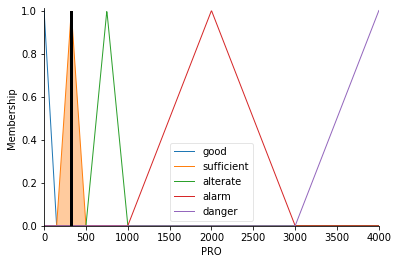

In [23]:
ProtACERule = []

ProtACERule.append(ctrl.Rule(DiffACE['2'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['1'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['3'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], Proteinuria['danger']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], Proteinuria['good']))

ProtACE_control = ctrl.ControlSystem(ProtACERule)
ProtACE_simulation = ctrl.ControlSystemSimulation(ProtACE_control)

ProtACE_simulation.input['GLY'] = 89
ProtACE_simulation.input['DIF'] = 2.5

ProtACE_simulation.compute()
print(ProtACE_simulation.output['PRO'])
Proteinuria.view(sim = ProtACE_simulation)

93.55931843241494


c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


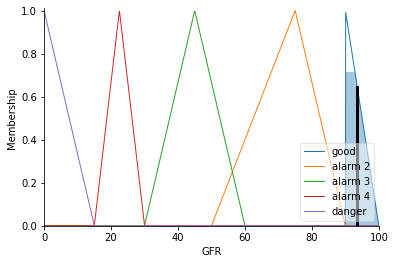

In [13]:
GFRACERule = []

GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['3'], GFR['alarm 4']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['4'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], GFR['good']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], GFR['danger']))

GFRACE_control = ctrl.ControlSystem(GFRACERule)
GFRACE_simulation = ctrl.ControlSystemSimulation(GFRACE_control)

GFRACE_simulation.input['GLY'] = 89
GFRACE_simulation.input['DIF'] = -2.5

GFRACE_simulation.compute()
print(GFRACE_simulation.output['GFR'])
GFR.view(sim = GFRACE_simulation)

**Nutrition Needs Recommendation**

c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\ADMIN\anaconda3\envs\RobotAI_Home\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1327.878098973695


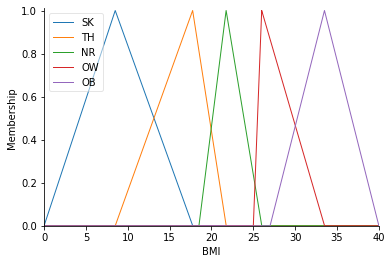

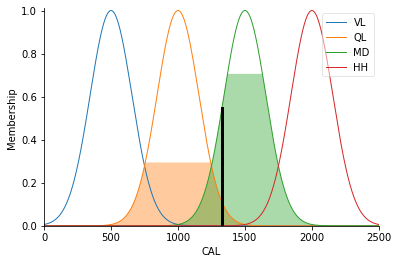

In [24]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating input signal
from skfuzzy import control as ctrl

BMI = ctrl.Antecedent(np.arange(0, 40.01, 0.01),  'BMI')
ACT = ctrl.Antecedent(np.arange(0, 2.51, 0.01), 'ACT')

CAL = ctrl.Consequent(np.arange(0, 2501, 1),    'CAL') #kcal

# Creating membership function

BMI['SK'] = fuzz.trimf(BMI.universe, [0, 17/2, 17.75])
BMI['TH'] = fuzz.trimf(BMI.universe, [17/2, 17.75, (18.5 + 25)/2])
BMI['NR'] = fuzz.trimf(BMI.universe, [18.5, (18.5 + 25)/2, 26])
BMI['OW'] = fuzz.trimf(BMI.universe, [25, 26, (27 + 40)/2])
BMI['OB'] = fuzz.trimf(BMI.universe, [27, (27 + 40)/2, 40])

BMI.view()

ACT['VL'] = fuzz.trimf(ACT.universe, [0, 1.3, 1.65])
ACT['QL'] = fuzz.trimf(ACT.universe, [1.3, 1.65, 1.76])
ACT['MD'] = fuzz.trimf(ACT.universe, [1.65, 1.76, 2.1])
ACT['HV'] = fuzz.trimf(ACT.universe, [1.76, 2.1, 2.5])

CAL['VL'] = fuzz.gaussmf(CAL.universe, 500, 156.25)
CAL['QL'] = fuzz.gaussmf(CAL.universe, 1000, 156.25)
CAL['MD'] = fuzz.gaussmf(CAL.universe, 1500, 156.25)
CAL['HH'] = fuzz.gaussmf(CAL.universe, 2000, 156.25)

# Rule creation

rule_list = []

rule_list.append(ctrl.Rule(BMI['SK'] & ACT['VL'], CAL['MD']))
rule_list.append(ctrl.Rule(BMI['SK'] & ACT['QL'], CAL['HH']))
rule_list.append(ctrl.Rule(BMI['SK'] & ACT['MD'], CAL['HH']))
rule_list.append(ctrl.Rule(BMI['SK'] & ACT['HV'], CAL['HH']))

rule_list.append(ctrl.Rule(BMI['TH'] & ACT['VL'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['TH'] & ACT['QL'], CAL['MD']))
rule_list.append(ctrl.Rule(BMI['TH'] & ACT['MD'], CAL['MD']))
rule_list.append(ctrl.Rule(BMI['TH'] & ACT['HV'], CAL['HH']))

rule_list.append(ctrl.Rule(BMI['NR'] & ACT['VL'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['NR'] & ACT['QL'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['NR'] & ACT['MD'], CAL['MD']))
rule_list.append(ctrl.Rule(BMI['NR'] & ACT['HV'], CAL['MD']))

rule_list.append(ctrl.Rule(BMI['OW'] & ACT['VL'], CAL['VL']))
rule_list.append(ctrl.Rule(BMI['OW'] & ACT['QL'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['OW'] & ACT['MD'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['OW'] & ACT['HV'], CAL['MD']))

rule_list.append(ctrl.Rule(BMI['OB'] & ACT['VL'], CAL['VL']))
rule_list.append(ctrl.Rule(BMI['OB'] & ACT['QL'], CAL['VL']))
rule_list.append(ctrl.Rule(BMI['OB'] & ACT['MD'], CAL['QL']))
rule_list.append(ctrl.Rule(BMI['OB'] & ACT['HV'], CAL['QL']))

KCAL_ctrl = ctrl.ControlSystem(rule_list)
KCAL_sim  = ctrl.ControlSystemSimulation(KCAL_ctrl)

KCAL_sim.input['BMI'] = 26
KCAL_sim.input['ACT'] = 2

KCAL_sim.compute()

print(KCAL_sim.output['CAL'])
CAL.view(sim=KCAL_sim)